In [1]:
# Type of glass:
# 1 building_windows_float_processed
# 2 building_windows_non_float_processed
# 3 vehicle_windows_float_processed
# 4 vehicle_windows_non_float_processed (none in this database)
# 5 containers
# 6 tableware
# 7 headlamps

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Praveen\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## Importing the dataset

In [3]:
column_names = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df = pd.read_csv('glass.data', sep = ',', names = column_names)

In [4]:
df.head(10)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [5]:
df.drop('Id number', axis=1, inplace=True)

In [6]:
df.shape

(214, 10)

In [7]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(213, 10)

In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Outliers are not treated because the chemical difference is important for the model.

## EDA

In [11]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type of glass,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


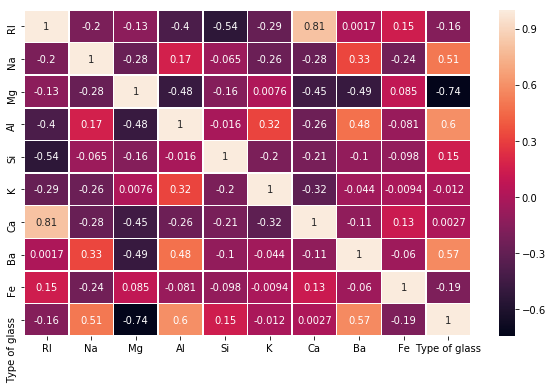

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(data = df.corr(), annot=True, linewidth=.5)

Text(0, 0.5, 'Ca')

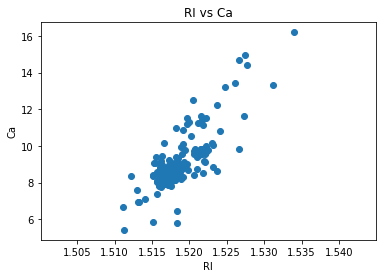

In [13]:
plt.scatter(df['RI'], df['Ca'])
plt.title('RI vs Ca')
plt.xlabel('RI')
plt.ylabel('Ca')

The features 'RI' and 'Ca' is highly co-related. So, any one of the column can be dropped.<br>
The feature 'RI' will be dropped here as it is moderately co-related with other features.

Text(0, 0.5, 'Ca')

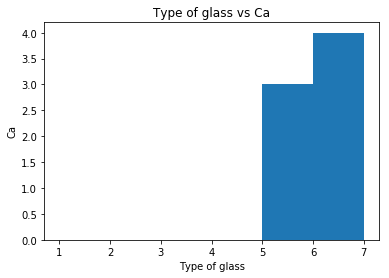

In [14]:
plt.hist(df['Ca'], df['Type of glass'])
plt.title('Type of glass vs Ca')
plt.xlabel('Type of glass')
plt.ylabel('Ca')

Text(0, 0.5, 'K')

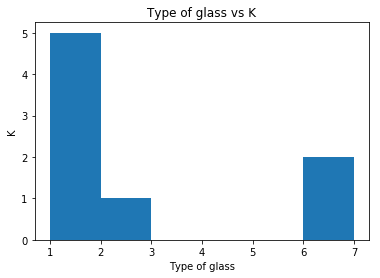

In [15]:
plt.hist(df['K'], df['Type of glass'])
plt.title('Type of glass vs K')
plt.xlabel('Type of glass')
plt.ylabel('K')

The features 'RI' and 'K' will not be dropped as it contributes to the predictions of specfic glass types even though it as very less co-relation to the target.

In [16]:
df.drop('RI', axis=True, inplace=True)

In [17]:
df.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Features and Target

In [18]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

## Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting the model

### Euclidean Distance

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier_euc = KNeighborsClassifier(metric = 'euclidean')
classifier_euc.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

### Manhattan Distance

In [22]:
classifier_manh = KNeighborsClassifier(metric = 'manhattan')
classifier_manh.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

## Predicting a new result

### Euclidean

In [23]:
print(classifier_euc.predict(sc.transform([[13.30, 3.60, 1.06, 53.09, 1.58, 6.17, 0.0, 0.10]])))

[2]


### Manhattan

In [24]:
print(classifier_manh.predict(sc.transform([[13.30, 3.60, 1.06, 53.09, 1.58, 6.17, 0.0, 0.10]])))

[2]


## Predicting the test results

### Euclidean

In [25]:
# Predicting test set results
y_pred_euc = classifier_euc.predict(X_test)
pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_euc})

,Actual,Predicted
0,1,1
1,1,1
2,3,1
3,2,2
4,1,1
5,3,1
6,1,3
7,2,2
8,1,2
9,2,2


### Manhattan

In [26]:
# Predicting test set results
y_pred_manh = classifier_manh.predict(X_test)
pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_manh})

,Actual,Predicted
0,1,1
1,1,1
2,3,1
3,2,2
4,1,1
5,3,1
6,1,1
7,2,2
8,1,2
9,2,2


## Confusion Matrix

### Euclidean

In [27]:
from sklearn.metrics import confusion_matrix
cm_euc = confusion_matrix(y_test, y_pred_euc)
print(cm_euc)

[[13  3  2  0  0  0]
 [ 5 13  0  1  0  0]
 [ 3  1  0  0  0  0]
 [ 0  1  0  1  0  1]
 [ 1  0  0  1  0  0]
 [ 0  0  0  0  0  8]]


### Manhattan

In [28]:
cm_manh = confusion_matrix(y_test, y_pred_manh)
print(cm_manh)

[[13  4  1  0  0  0]
 [ 5 13  0  1  0  0]
 [ 4  0  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 1  0  0  1  0  0]
 [ 0  0  0  0  0  8]]


## Accuracy

### Euclidean

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_euc))

0.6481481481481481


### Manhattan

In [30]:
print(accuracy_score(y_test, y_pred_manh))

0.6666666666666666


## Report

### Classification report for Euclidean distance

In [31]:
from sklearn.metrics import classification_report
target_names = ['building_windows_float_processed', 'building_windows_non_float_processed', \
                'vehicle_windows_float_processed', 'containers', 'tableware', 'headlamps']
# Type 4 - vehicle_windows_non_float_processed, not used in target_names because there is none in dataset.
print(classification_report(y_test, y_pred_euc, target_names=target_names, zero_division=1))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.59      0.72      0.65        18
building_windows_non_float_processed       0.72      0.68      0.70        19
     vehicle_windows_float_processed       0.00      0.00      0.00         4
                          containers       0.33      0.33      0.33         3
                           tableware       1.00      0.00      0.00         2
                           headlamps       0.89      1.00      0.94         8

                            accuracy                           0.65        54
                           macro avg       0.59      0.46      0.44        54
                        weighted avg       0.64      0.65      0.62        54



### Classification report for Manhattan distance

In [33]:
print(classification_report(y_test, y_pred_manh, target_names=target_names, zero_division=1))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.57      0.72      0.63        18
building_windows_non_float_processed       0.72      0.68      0.70        19
     vehicle_windows_float_processed       0.00      0.00      0.00         4
                          containers       0.50      0.67      0.57         3
                           tableware       1.00      0.00      0.00         2
                           headlamps       1.00      1.00      1.00         8

                            accuracy                           0.67        54
                           macro avg       0.63      0.51      0.48        54
                        weighted avg       0.66      0.67      0.64        54



### The performance of the two models using different distance metrics, compared in terms of accuracy to the test data and Scikit-Learn Classification Report

*The accuracy is almost same for both the distance metrics used.<br><br>
The precision, recall and f1-score are all almost similar for all the classes present.<br><br>
It proves that the perfomance would be same whether we use Euclidean distance or Manhattan distance.<br><br>
In other words, distance metric does not affect the final result or performance of the KNN model.*